In [1]:
import os
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import matplotlib
from datetime import datetime
import time
import pickle
import museek.util.tools as tl

plt.style.use('classic')
plt.subplots_adjust(bottom=0.15,top=0.95,left=0.15,right=0.95)

from matplotlib import rcParams
#rcParams['font.family']='STIXGeneral'
params={'font.family':'DejaVu Serif',
        'font.serif':'Times New Roman',
        'font.style':'normal',
        'font.weight':'normal',
        }
rcParams.update(params)

matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)
matplotlib.rcParams['xtick.major.pad']='3'
matplotlib.rcParams['ytick.major.pad']='2'

<Figure size 640x480 with 0 Axes>

In [18]:
block_name = '1683492604'
data_path = '/idia/projects/hi_im/uhf_2023/pipeline_results/'
data_read = pickle.load(open(data_path+block_name+'/'+block_name+'_calibrated_visibility.pkl','rb'))
calibrated_vis = data_read['calibrated_visibility'] / 10**6.
antenna_list = data_read['antenna_list']
ra = data_read['ra']
dec = data_read['dec']
freq = data_read['freq'] / 10**6. 
timestamps = data_read['timestamps']


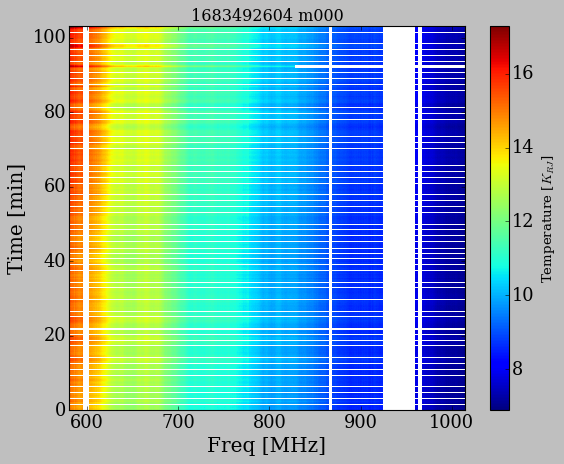

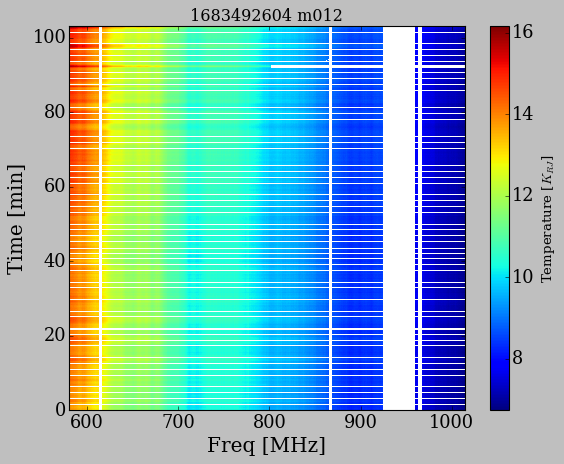

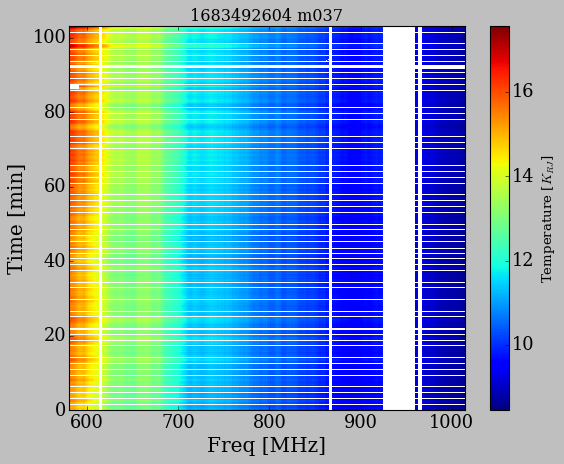

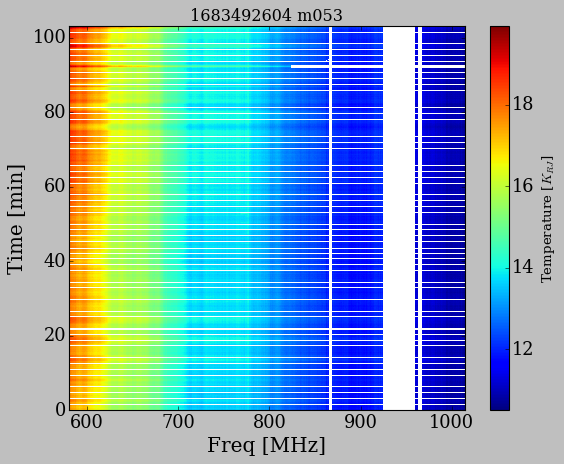

In [6]:
for i_antenna, antenna in enumerate(antenna_list):
    plt.pcolormesh(freq, (timestamps-timestamps.min())/60,calibrated_vis[:,:,i_antenna])
    plt.colorbar(label=r'Temperature [$K_{RJ}$]')
    plt.ylabel('Time [min]', fontsize=18)
    plt.xlabel('Freq [MHz]', fontsize=18)
    plt.title(block_name+' '+antenna)
    plt.xlim(freq.min(), freq.max())
    plt.ylim(0, (timestamps.max()-timestamps.min())/60)
    #plt.savefig()
    plt.show()
    #plt.clf()
    

m000 600MHz is masked


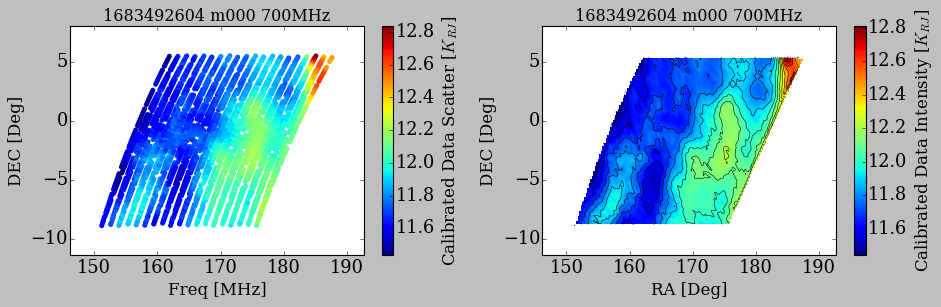

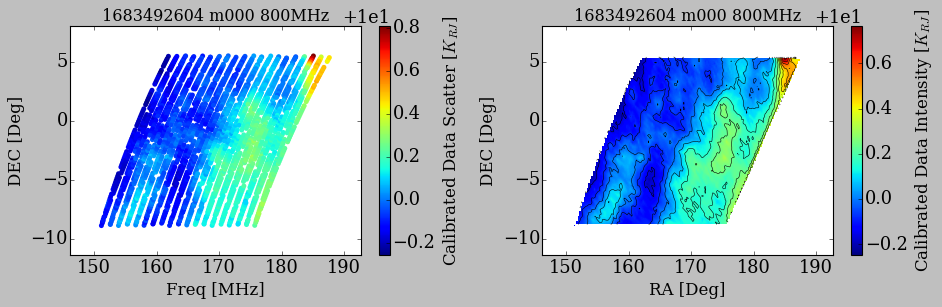

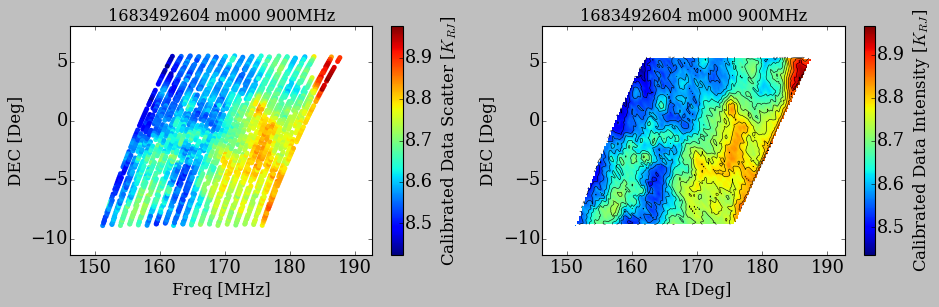

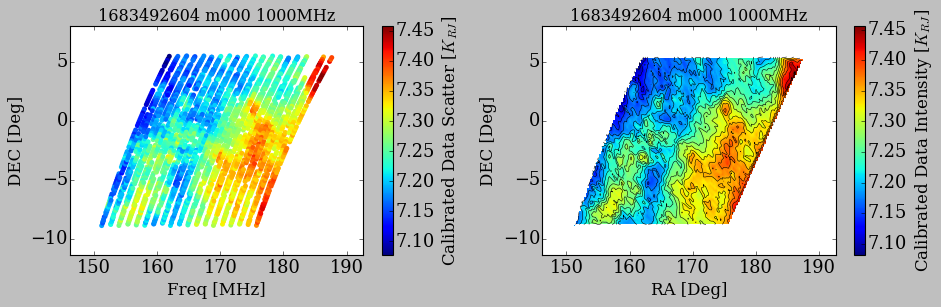

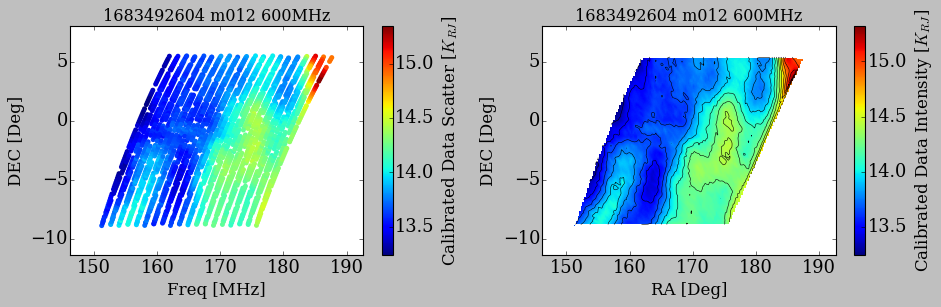

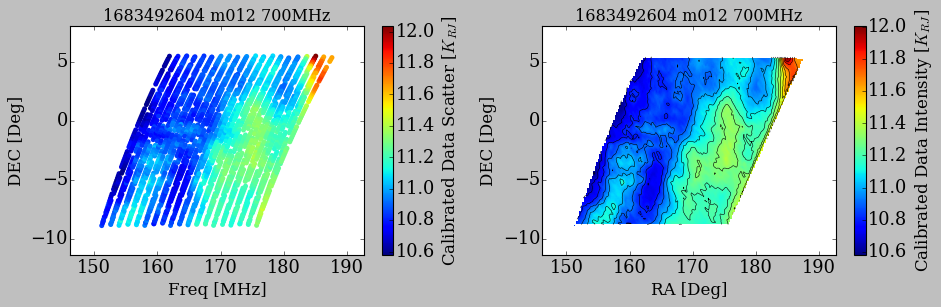

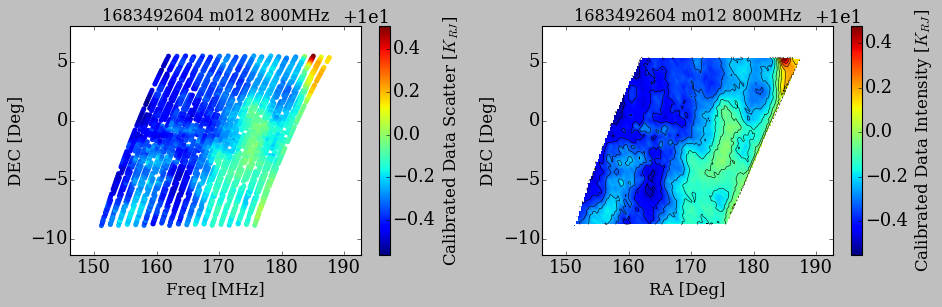

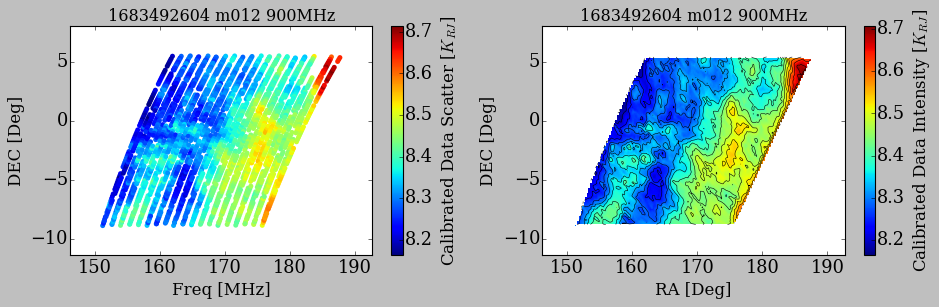

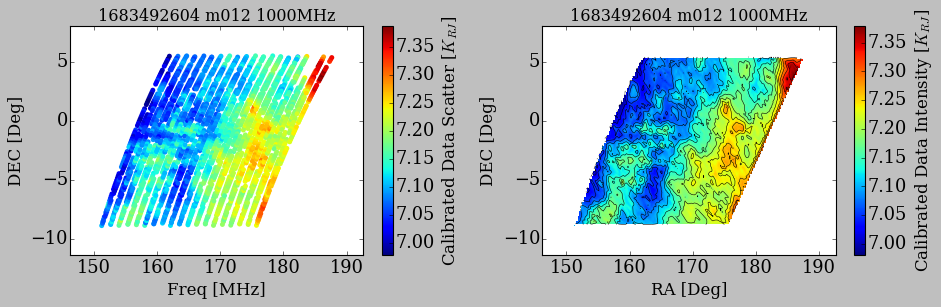

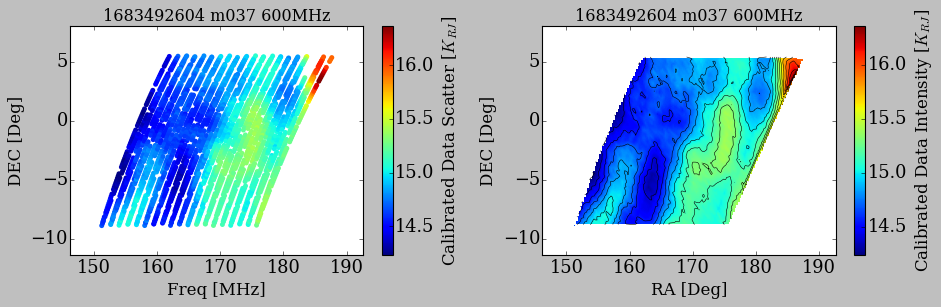

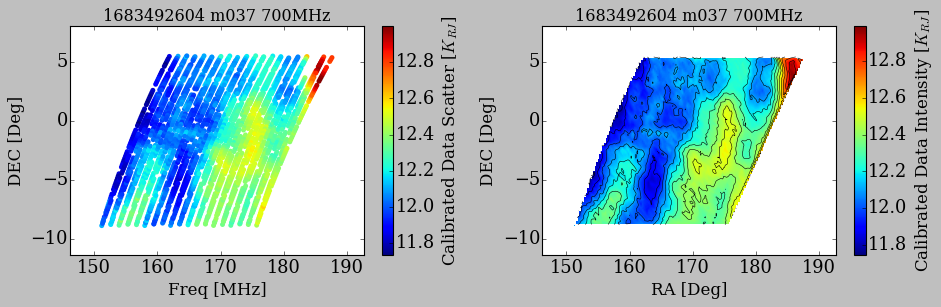

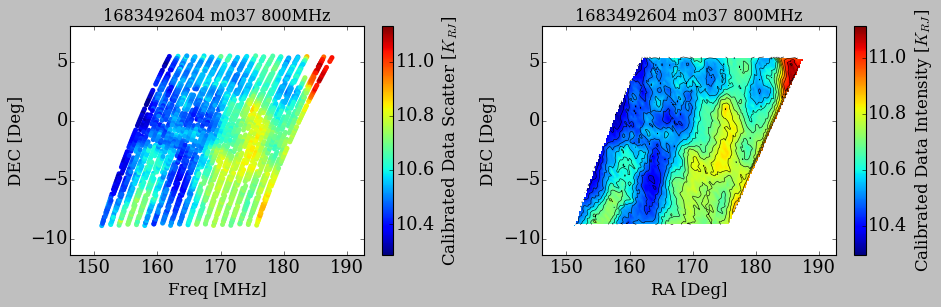

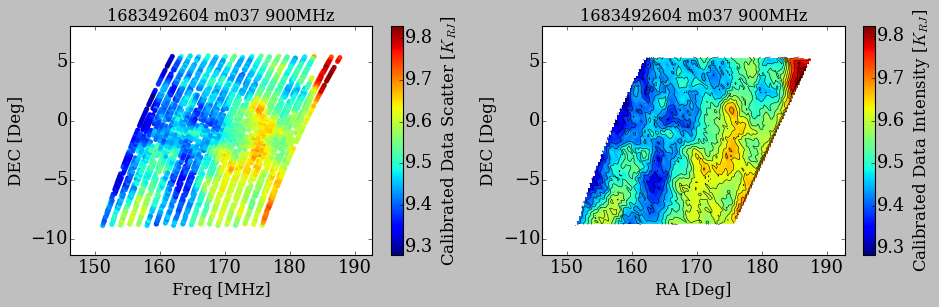

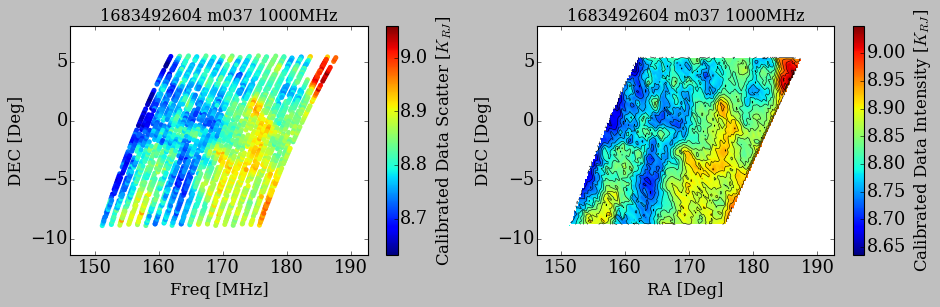

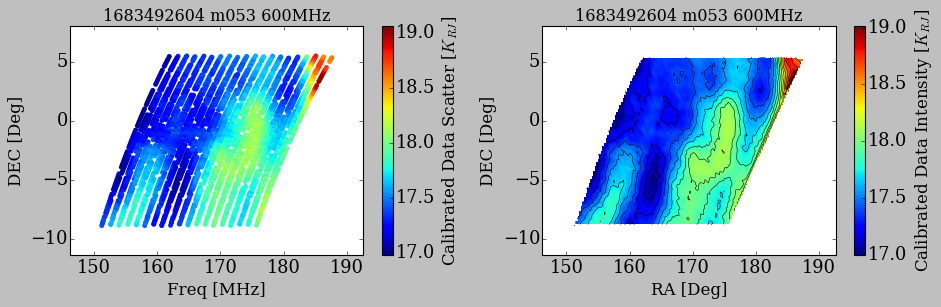

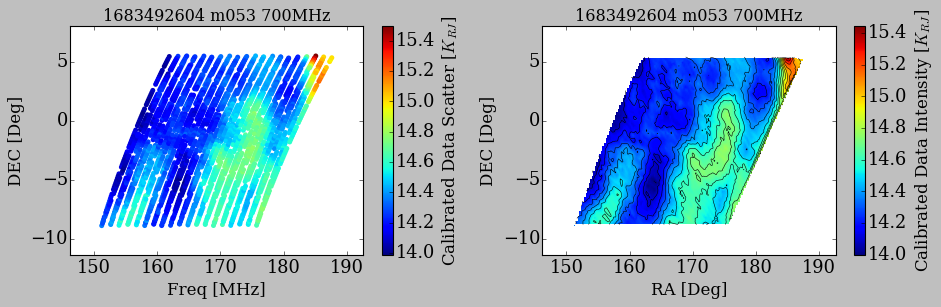

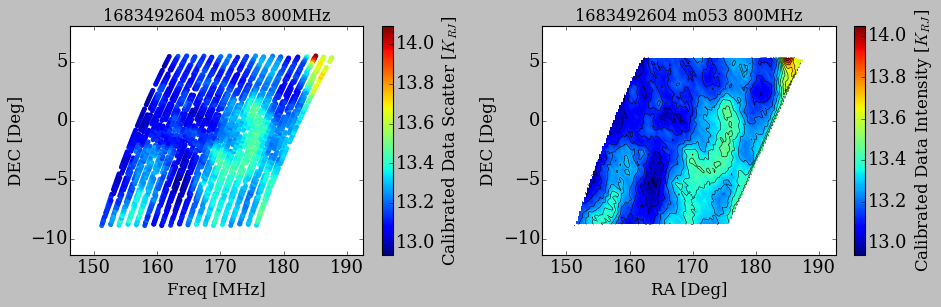

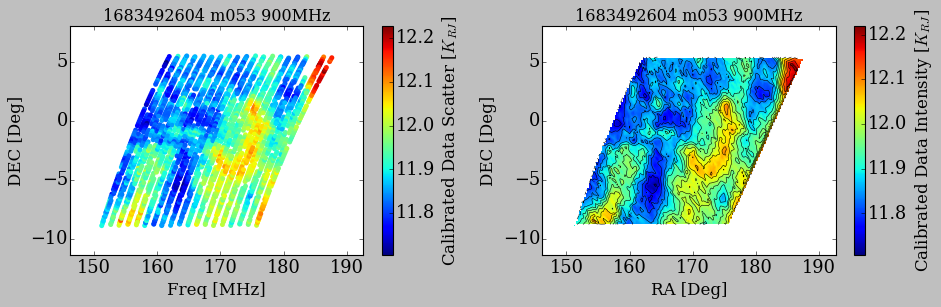

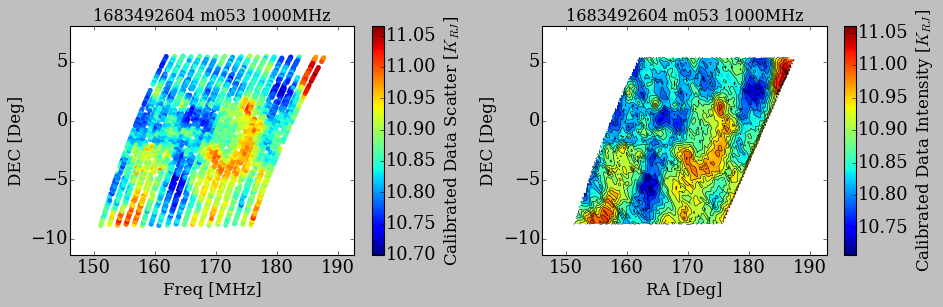

In [7]:
freq_plot_list = np.arange(600, 1020, 100)

for i_antenna, antenna in enumerate(antenna_list):
    for freq_plot in freq_plot_list:
        index_freq_plot = np.argmin(np.abs(freq-freq_plot))

        if np.sum(calibrated_vis[:,index_freq_plot,i_antenna].mask>0) == calibrated_vis[:,index_freq_plot,i_antenna].shape[0]:
            print (antenna + ' ' +str(freq_plot) + 'MHz is masked')
        else:
            fig = plt.figure(figsize=(12, 4))
        
            ax = fig.add_subplot(1, 2, 1)
            sc_data = ax.scatter(ra[:,i_antenna], dec[:,i_antenna], c=calibrated_vis[:,index_freq_plot,i_antenna], edgecolor='none', cmap='jet')
            ax.set_xlabel('Freq [MHz]', fontsize=15)
            ax.set_ylabel('DEC [Deg]', fontsize=15)
            ax.set_title(block_name+' '+antenna+' '+str(freq_plot) +'MHz')
            ax.set_xlim(ra.min()-5, ra.max()+5)
            ax.set_ylim(dec.min()-2.5, dec.max()+2.5)
            cbar_data = plt.colorbar(sc_data)
            cbar_data.set_label(r'Calibrated Data Scatter [$K_{RJ}$]', fontsize=15)
        
    
            ax = fig.add_subplot(1, 2, 2)
            mp_data = tl.plot_data(ra[:,i_antenna], dec[:,i_antenna], calibrated_vis[:,index_freq_plot,i_antenna], gsize=150)
            plt.xlabel('RA [Deg]', fontsize=15)
            plt.ylabel('DEC [Deg]', fontsize=15)
            ax.set_title(block_name+' '+antenna+' '+str(freq_plot) +'MHz')
            ax.set_xlim(ra.min()-5, ra.max()+5)
            ax.set_ylim(dec.min()-2.5, dec.max()+2.5)
            cbar_mp = plt.colorbar(mp_data)
            cbar_mp.set_label(r'Calibrated Data Intensity [$K_{RJ}$]', fontsize=15)
            plt.tight_layout()
            plt.show()
            #plt.savefig()
            #plt.clf()
